In [37]:
import analyze
from gmm import GMM
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import numpy as np

In [38]:
penguins = pd.read_csv("penguins_lter.csv")
iris = pd.read_csv("Iris.csv") # https://www.kaggle.com/datasets/uciml/iris

In [39]:
def fit_and_plot(data, var_name):
    """
    Calculate the best GMM model for the given data and plot its PDF and CDF.
    Sample new data from the model and plot a comparing histogram of simulated and original data.

    Parameters:
    data(pd.Series): The data to fit the GMM model to.
    var_name(str): The name of the variable being analyzed.
    """

    gmm_model = GMM()
    
    best_aic = np.inf
    best_K = 0
    best_weight = None
    best_mu = None
    best_sigma = None

    for K in range(2, 11):
        result = gmm_model.fit(data, K)
        wgt = result["weights"]
        mu = result["means"]
        sigma = result["std_devs"]
        aic = analyze.calc_AIC(data, wgt, mu, sigma)
        if aic < best_aic:
            best_aic = aic
            best_K = K  
            best_weight = wgt
            best_mu = mu
            best_sigma = sigma



    x = np.linspace(min(data), max(data), 1000)
    pdf = gmm_model.pdf(x, best_weight, best_mu, best_sigma)
    cdf = gmm_model.cdf(x, best_weight, best_mu, best_sigma)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x, pdf, label='PDF')
    plt.title(f'PDF of {var_name}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, cdf, label='CDF')
    plt.title(f'CDF of {var_name}')
    plt.legend()
    plt.show()


    simulated_data = []
    print(best_weight)
    print(best_K)
    for _ in range(len(data)):
        # sample data from the normal distribution randomly using one of the K possible mus and sigmas 
        component = np.random.choice(range(best_K), p=best_weight)
        simulated_data.append(np.random.normal(best_mu[component], best_sigma[component]))
    simulated_data = np.array(simulated_data)

    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=30, alpha=0.5, label='Original Data')
    plt.hist(simulated_data, bins=30, alpha=0.5, label='Simulated Data')
    plt.title(f'Original vs Simulated Data: {var_name}')
    plt.legend()
    plt.show()

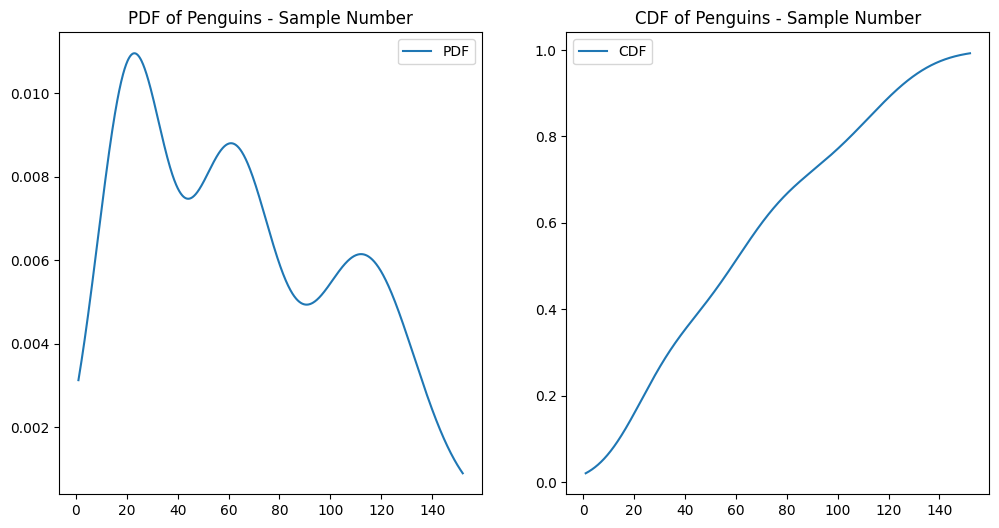

[0.30462164 0.34882618 0.34655218]
3


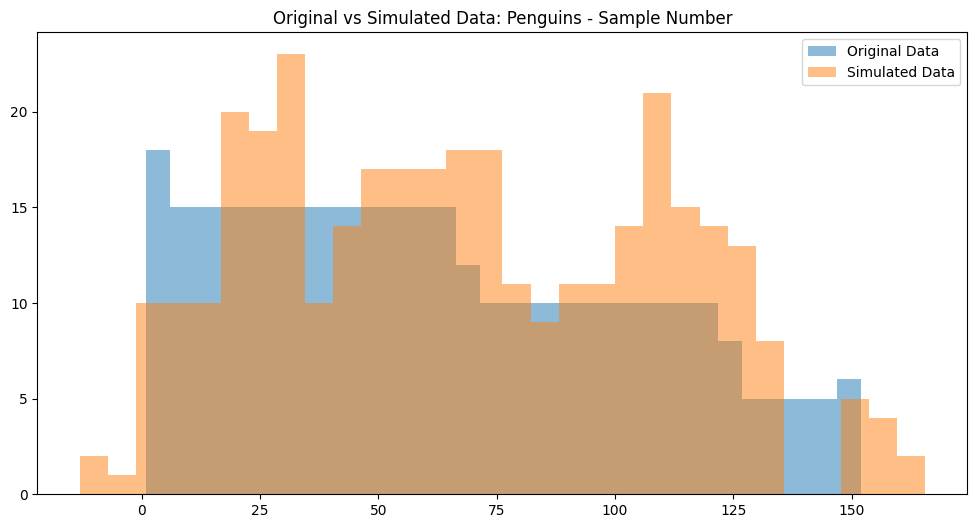

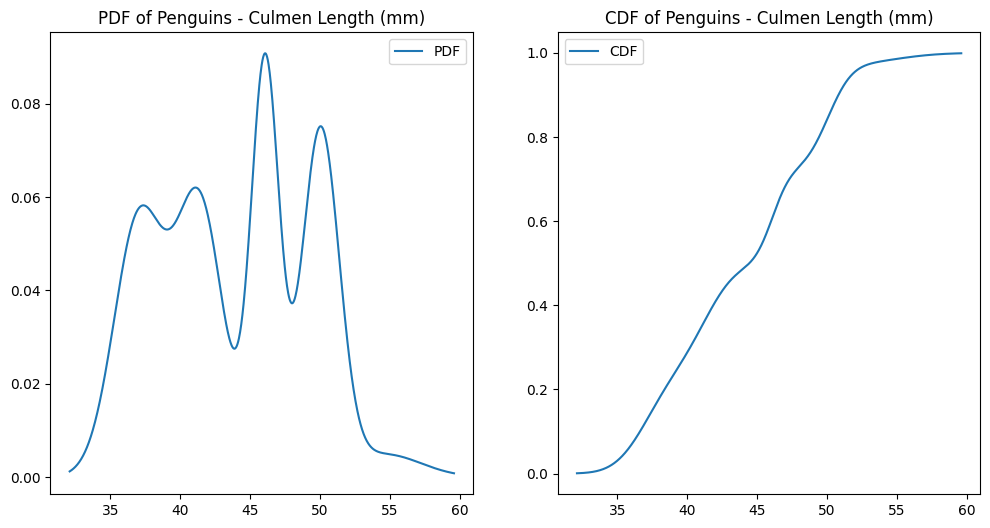

[0.2486283  0.24815643 0.2496897  0.22161673 0.03190883]
5


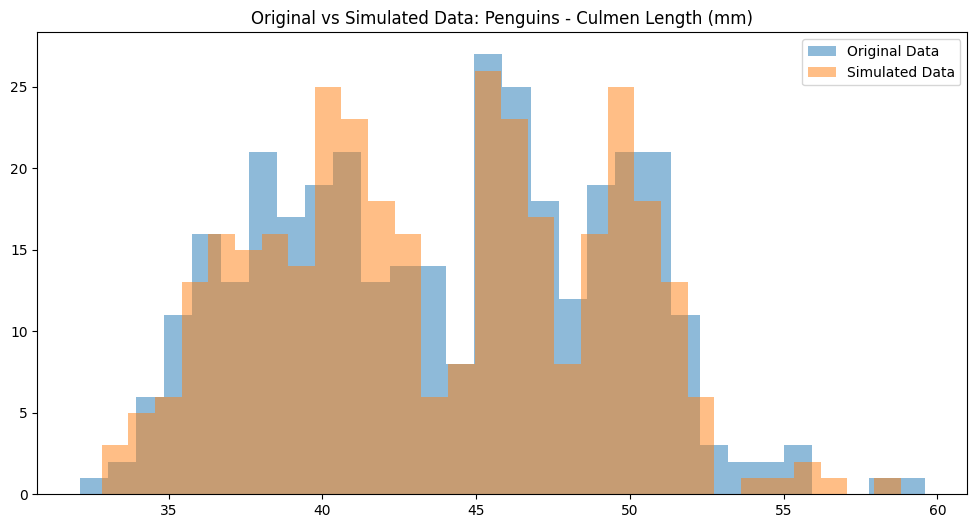

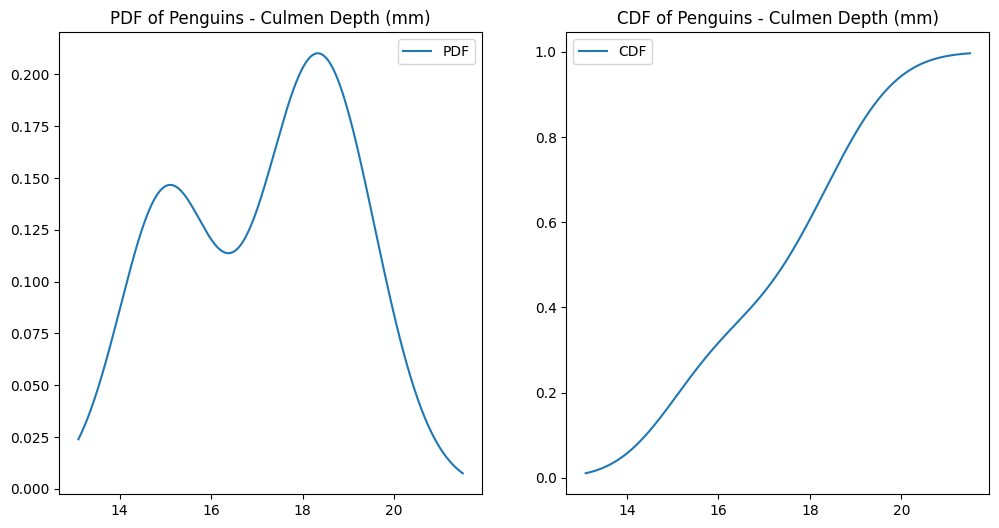

[0.64193042 0.35806958]
2


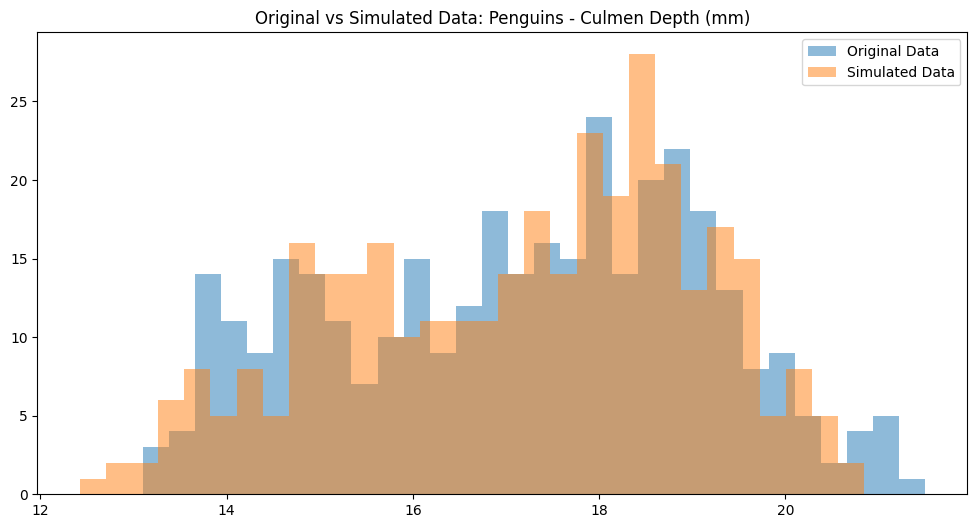

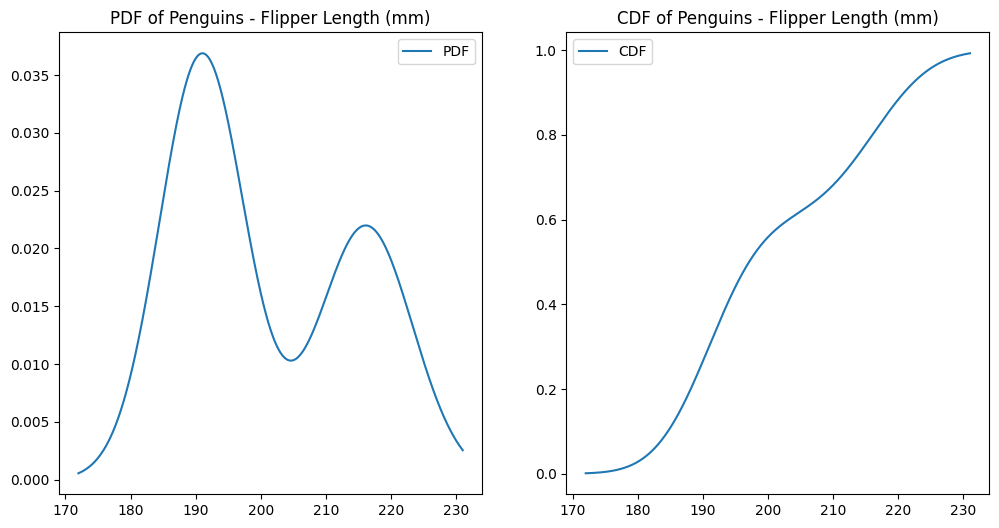

[0.39432014 0.60567986]
2


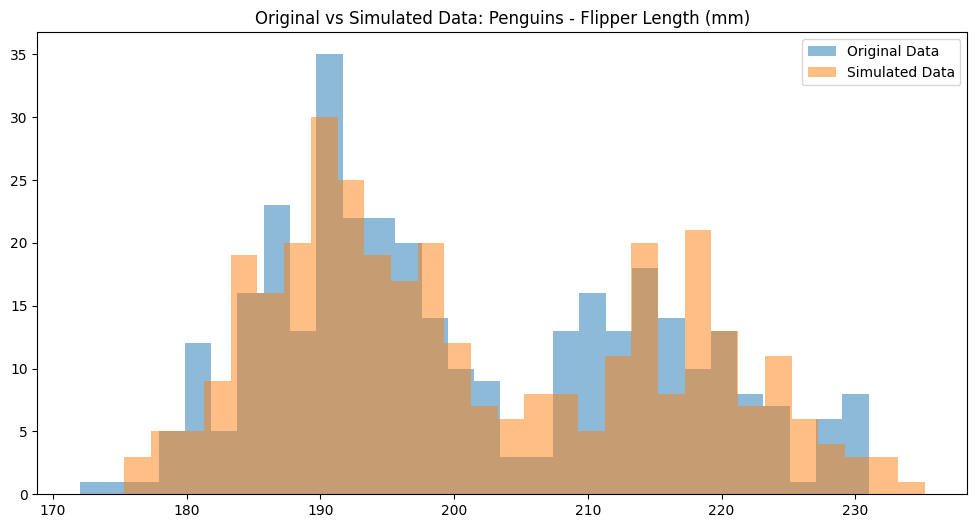

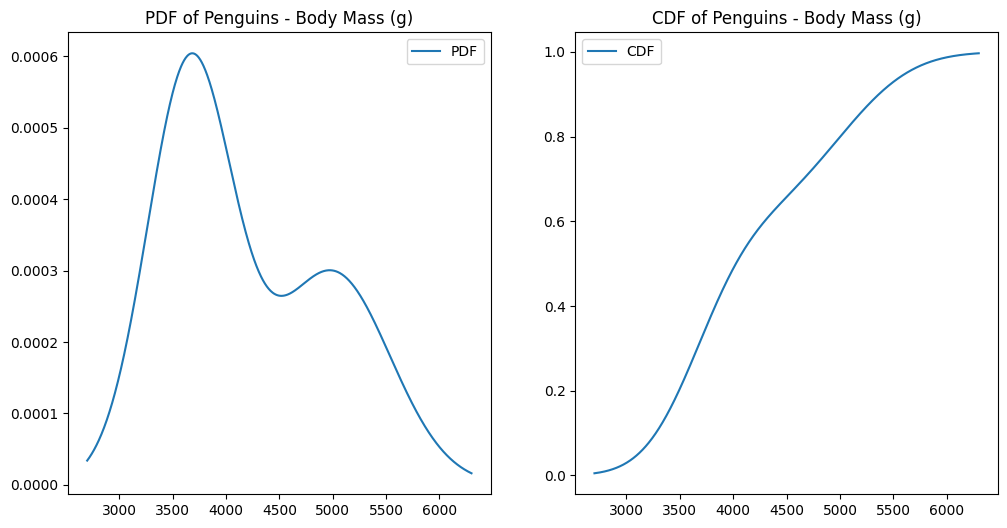

[0.59683025 0.40316975]
2


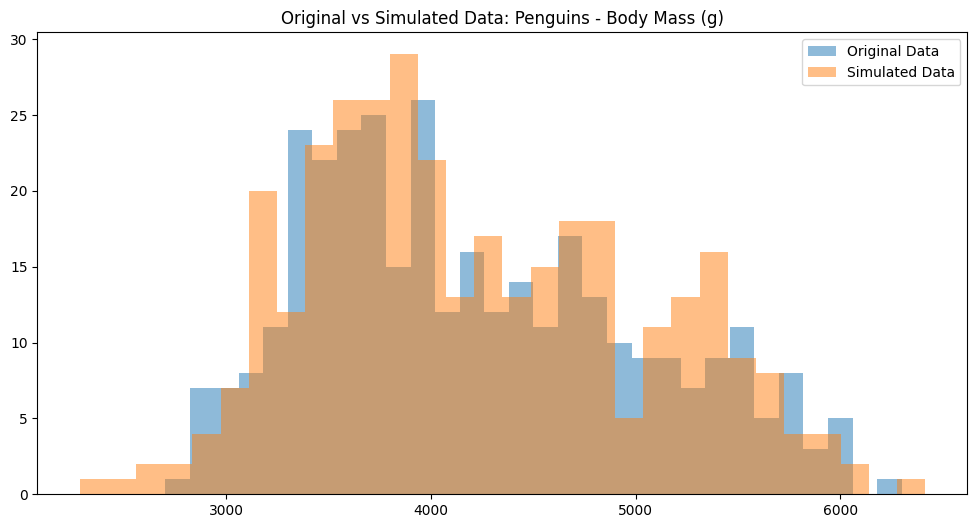

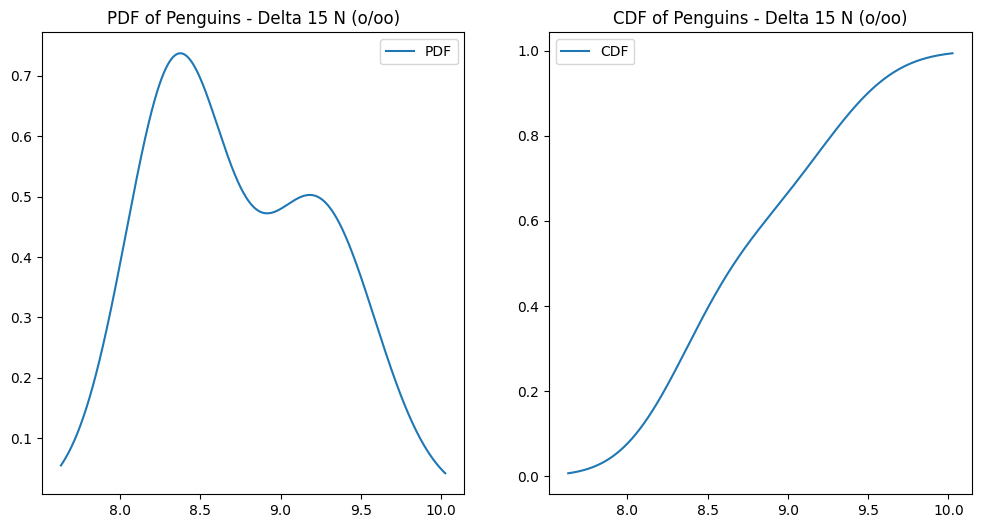

[0.43535391 0.56464609]
2


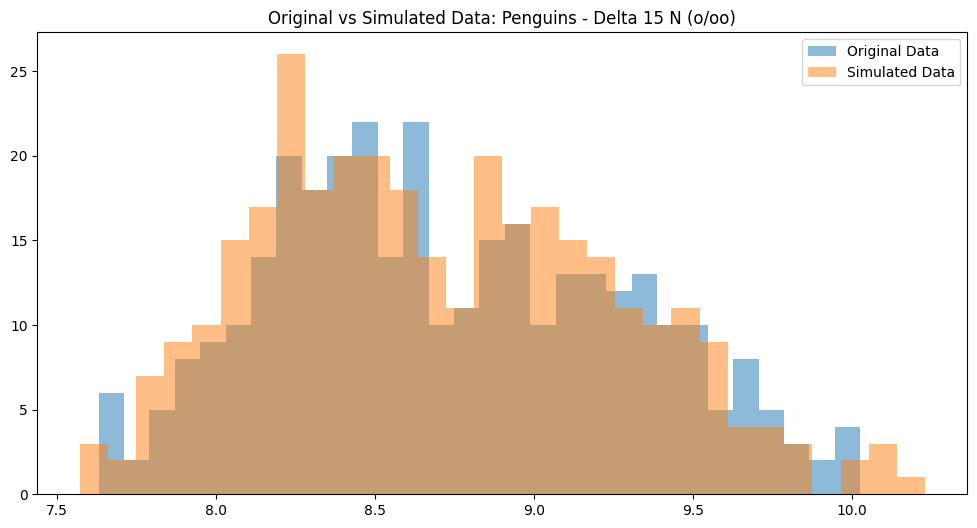

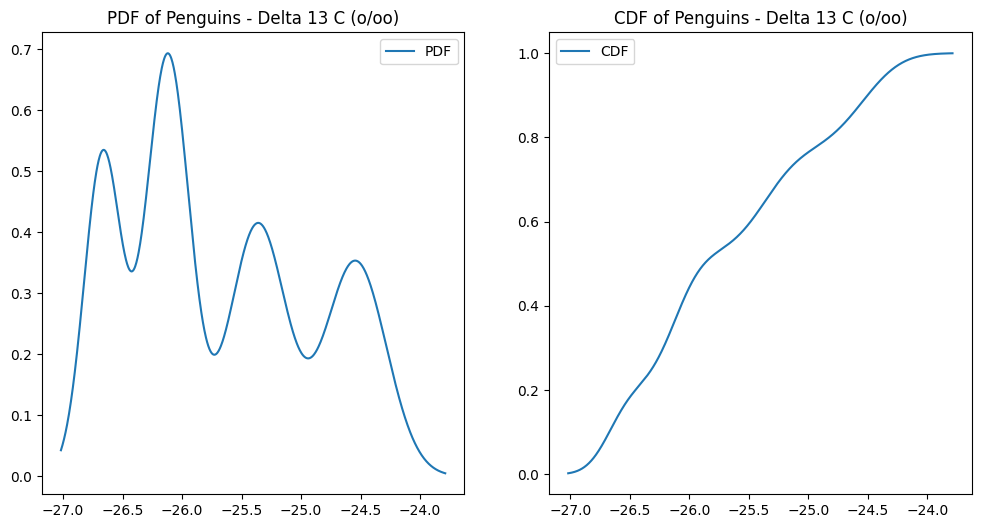

[0.24775807 0.22786759 0.31700566 0.20736869]
4


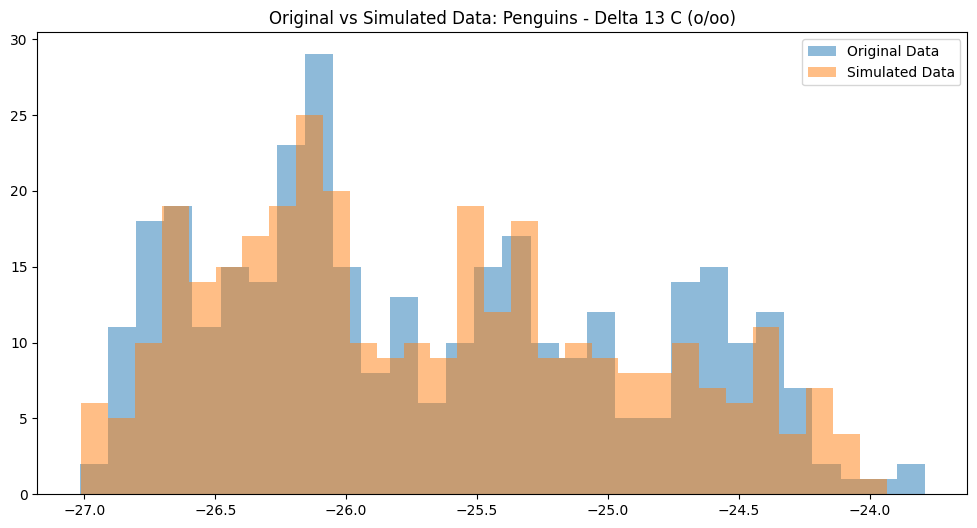

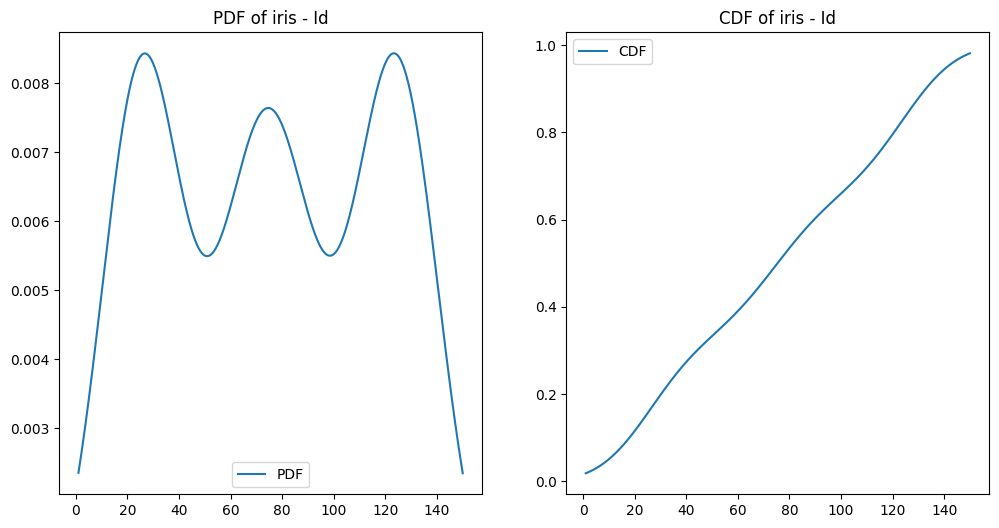

[0.3447648 0.3344626 0.3207726]
3


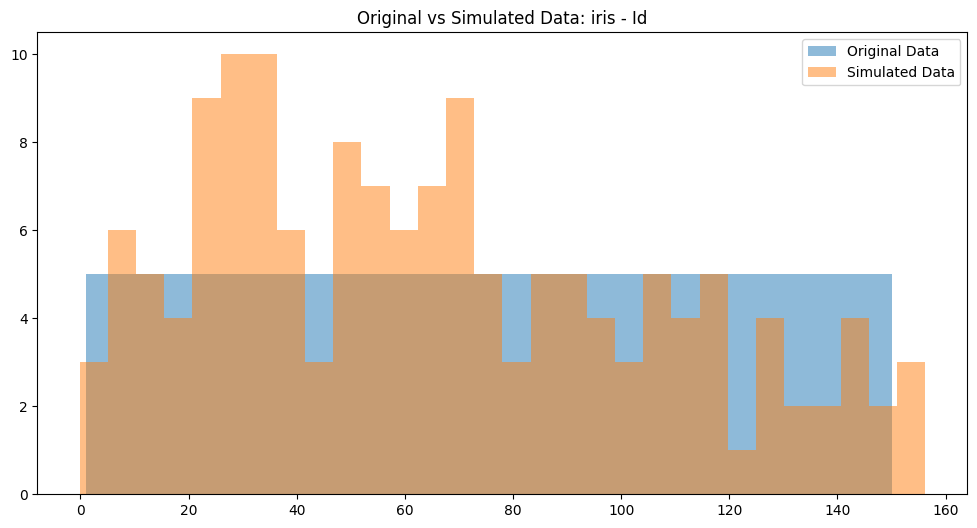

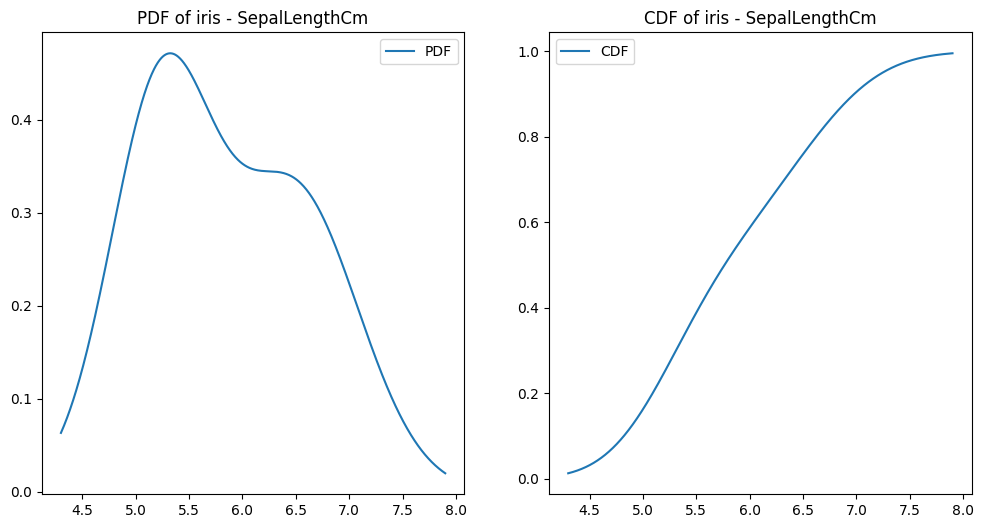

[0.48470307 0.51529693]
2


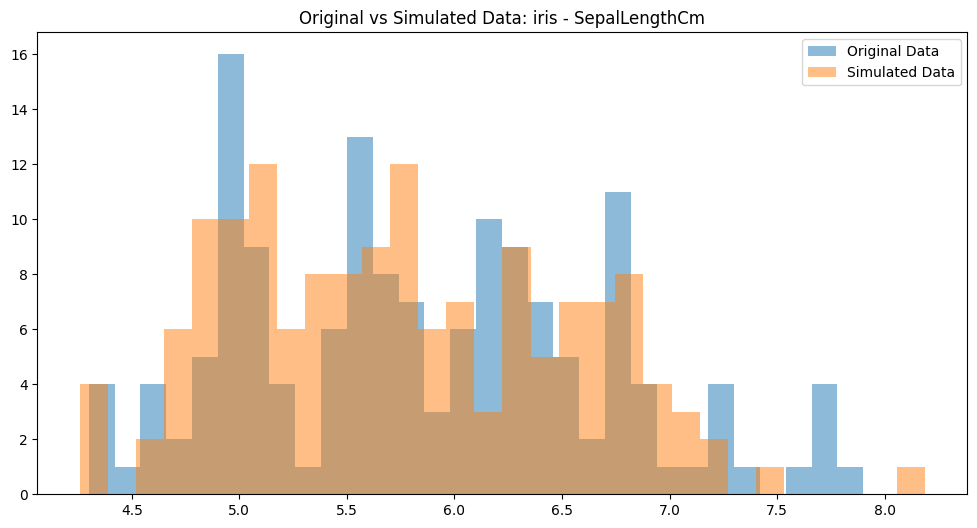

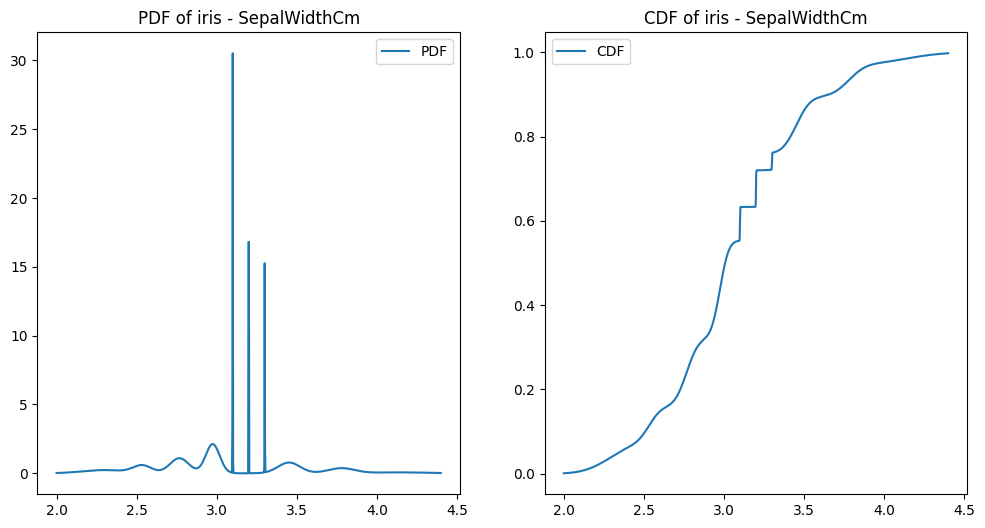

[0.03981847 0.08073617 0.07580955 0.23148493 0.1351303  0.07871779
 0.02924467 0.162482   0.08666368 0.07991246]
10


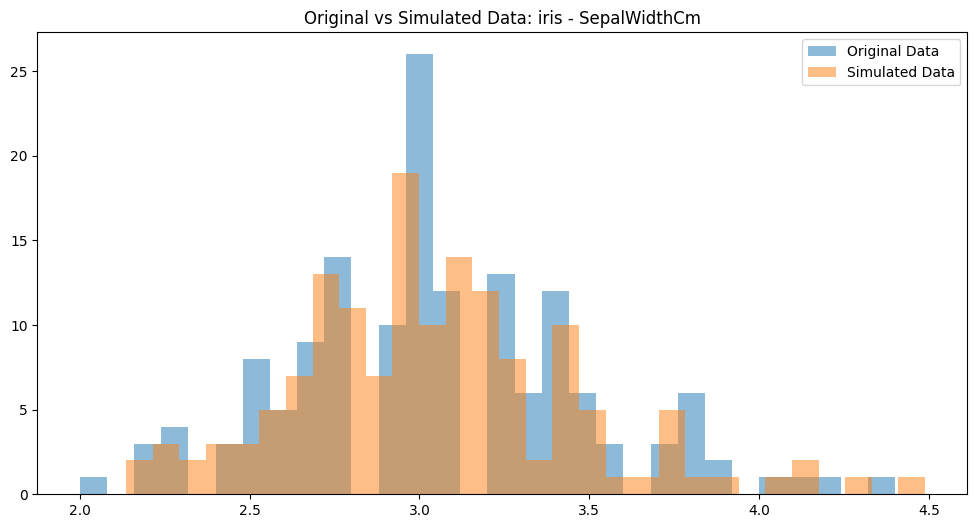

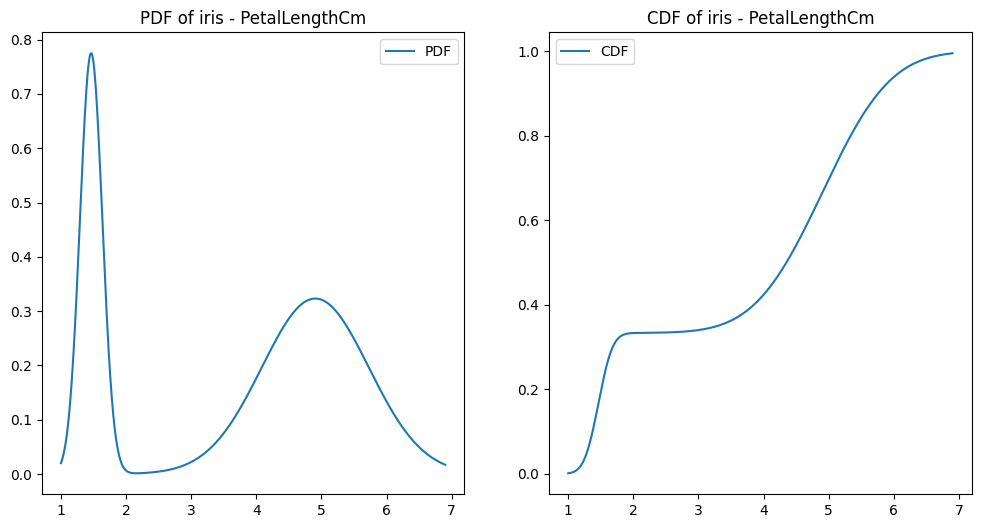

[0.6668841 0.3331159]
2


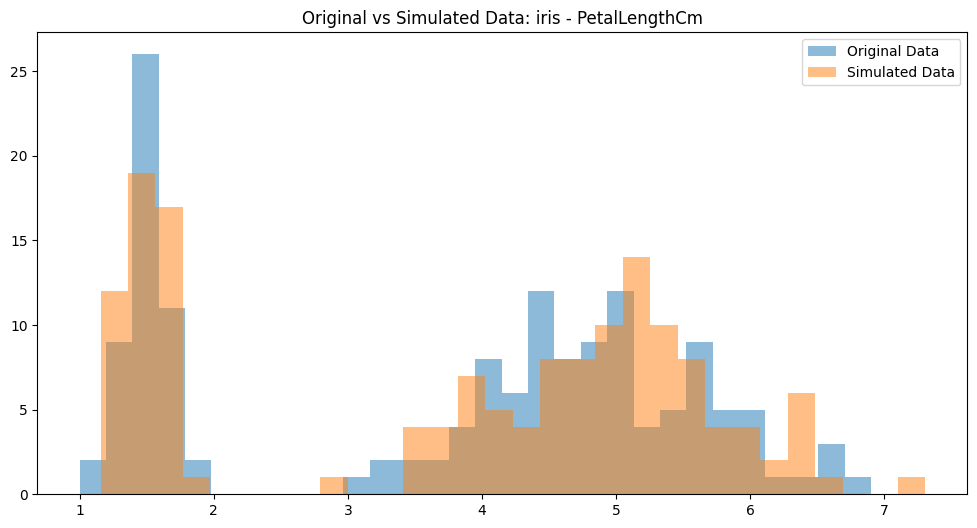

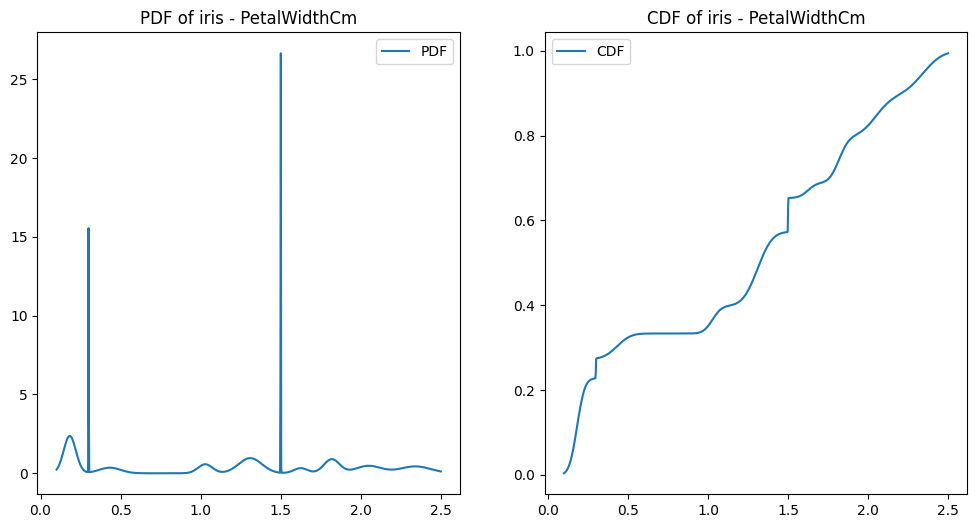

[0.03528465 0.22663769 0.10709796 0.17505525 0.06505344 0.10884652
 0.06020891 0.09541993 0.04648674 0.07990891]
10


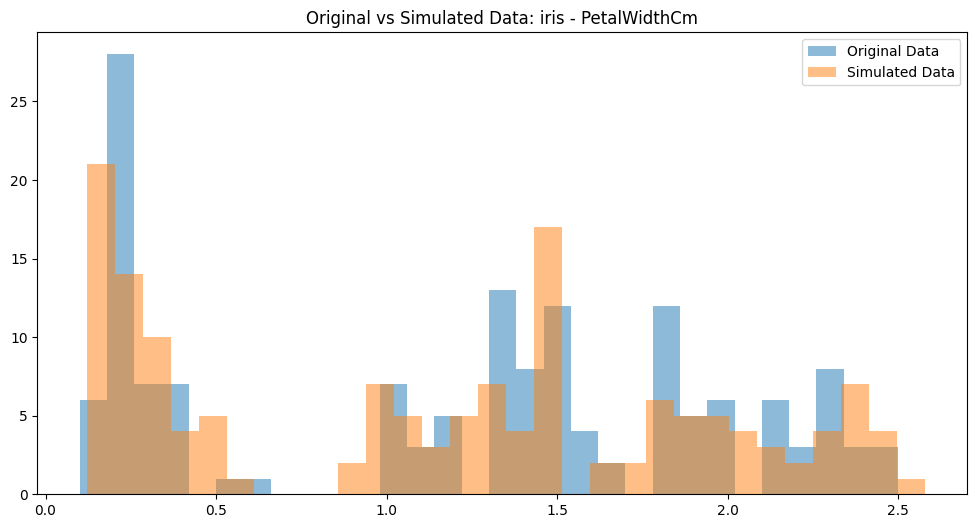

In [40]:
for column in penguins.columns:
    if is_numeric_dtype(penguins[column]):
        fit_and_plot(penguins[column].dropna().values, f"Penguins - {column}")

for column in iris.columns:
    if is_numeric_dtype(iris[column]):
        fit_and_plot(iris[column].dropna().values, f"iris - {column}")